In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
import keras.layers as L
from keras.models import Model
import os
s = tf.compat.v1.InteractiveSession()

In [2]:
def UNet():
    Xinpt = L.Input([None, None, 1])
    X0 = L.Conv2D(64, (3, 3), padding='same')(Xinpt)
    X0 = L.BatchNormalization()(X0)
    X0 = L.LeakyReLU(alpha=0.2)(X0)    #l,b,64
    X0 = L.Conv2D(64, (3, 3), strides=1, padding='same')(X0)
    X0 = L.BatchNormalization()(X0)
    X0 = L.LeakyReLU(alpha=0.2)(X0)    #l,b,64
    
    X1 = L.MaxPool2D((2, 2), strides=2)(X0)    #l/2,b/2,64
    X1 = L.Conv2D(128, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.LeakyReLU(alpha=0.2)(X1)
    X1 = L.Conv2D(128, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.LeakyReLU(alpha=0.2)(X1)    #l/2,b/2,128
    
    X2 = L.MaxPool2D((2, 2), strides=2)(X1)    #l/4,b/4,128
    X2 = L.Conv2D(256, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.LeakyReLU(alpha=0.2)(X2)
    X2 = L.Conv2D(256, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.LeakyReLU(alpha=0.2)(X2)    #l/4,b/4,256
    
    X3 = L.MaxPool2D((2, 2), strides=2)(X2)    #l/8,b/8,256
    X3 = L.Conv2D(512, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.LeakyReLU(alpha=0.2)(X3)
    X3 = L.Conv2D(512, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.LeakyReLU(alpha=0.2)(X3)    #l/8,b/8,512
    
    X4 = L.MaxPool2D((2, 2), strides=2)(X3)    #l/16,b/16,512
    X4 = L.Conv2D(1024, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.LeakyReLU(alpha=0.2)(X4)
    X4 = L.Conv2D(1024, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.LeakyReLU(alpha=0.2)(X4)    #l/16,b/16,1024
    
    X4 = L.Conv2DTranspose(512, (2, 2), strides=2)(X4)    #l/8,b/8,512
    X4 = L.Concatenate()([X3, X4])     #l/8,b/8,1024
    X4 = L.Conv2D(512, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.Activation('relu')(X4)
    X4 = L.Conv2D(512, (3, 3), padding='same')(X4)
    X4 = L.BatchNormalization()(X4)
    X4 = L.Activation('relu')(X4)    #l/8,b/8,512
    
    X3 = L.Conv2DTranspose(256, (2, 2), strides=2)(X4)    #l/4,b.4,256
    X3 = L.Concatenate()([X2, X3])     #l/4,b/4,512
    X3 = L.Conv2D(256, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.Activation('relu')(X3)
    X3 = L.Conv2D(256, (3, 3), padding='same')(X3)
    X3 = L.BatchNormalization()(X3)
    X3 = L.Activation('relu')(X3)    #l/4,b/4,256
    
    X2 = L.Conv2DTranspose(128, (2, 2), strides=2)(X3)    #l/2,b/2,128
    X2 = L.Concatenate()([X1, X2])     #l/2,b/2,256
    X2 = L.Conv2D(128, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.Activation('relu')(X2)
    X2 = L.Conv2D(128, (3, 3), padding='same')(X2)
    X2 = L.BatchNormalization()(X2)
    X2 = L.Activation('relu')(X2)   #l/2,b/2,128
    
    X1 = L.Conv2DTranspose(64, (2, 2), strides=2)(X2)    #l,b,64
    X1 = L.Concatenate()([X0, X1])    #l,b,128
    X1 = L.Conv2D(64, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.Activation('relu')(X1)
    X1 = L.Conv2D(64, (3, 3), padding='same')(X1)
    X1 = L.BatchNormalization()(X1)
    X1 = L.Activation('relu')(X1)    #l,b,64
    
    X0 = L.Conv2D(3, (1, 1), strides=1)(X1)     #l,b,3 
    model = Model(inputs=Xinpt, outputs=X0)
    return model

In [3]:
model = UNet()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 6 256         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, None, None, 6 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
model.compile('adam', loss='mean_squared_error', metrics=['accuracy'])

In [6]:
from keras.datasets import cifar10

In [7]:
train, test = cifar10.load_data()
train = train[0]
test = test[0]
train.shape, test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
train = train/255.
test = test/255.

In [9]:
gray_train = np.mean(train, axis=-1)  #taking mean of channel axis to create a grayscale image for training model
gray_train = gray_train.reshape((*gray_train.shape, 1))
gray_train.shape

(50000, 32, 32, 1)

In [10]:
gray_test = np.mean(test, axis=-1)
gray_test = gray_test.reshape((*gray_test.shape, 1))
gray_test.shape

(10000, 32, 32, 1)

In [11]:
train.max(), train.min(), gray_train.max(), gray_train.min()

(1.0, 0.0, 1.0, 0.0)

In [12]:
#Function to display random 5 images from training dataset and its predictions
def sample_batch(data, bsize):
    idxs = np.random.choice(np.arange(data.shape[0]), size=bsize)
    return idxs

def sample_images(data, gray, nrow):
    idx = sample_batch(gray, bsize=nrow)
    gray_batch = gray[idx]
    color_batch = data[idx]
    images = model.predict(gray_batch)
    if np.var(images)!=0:
        images = (images-images.min())/(images.max()-images.min())
    cnt=1
    for i in range(nrow):
        plt.subplot(nrow, 3, cnt)
        plt.imshow(color_batch[i].reshape((32, 32, 3)), cmap="gray", interpolation='none')
        plt.subplot(nrow, 3, cnt+1)
        plt.imshow(gray_batch[i].reshape((32, 32)), cmap="gray", interpolation='none')
        plt.subplot(nrow, 3, cnt+2)
        plt.imshow(images[i].reshape((32, 32, 3)), cmap="gray", interpolation='none')
        cnt += 3
    plt.show()

Epoch: 30
196/196 [==============================] - 5895s 30s/step - loss: 0.0040 - accuracy: 0.5723 - val_loss: 0.0051 - val_accuracy: 0.5529


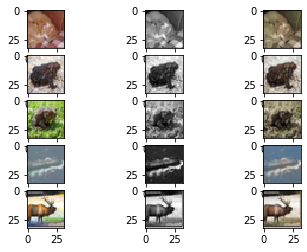

In [13]:
#training and printing results on training images. Left:Ground Truth, Center: Grayscale input, Right: Prediction
from IPython import display
for epoch in range(1,31):
    display.clear_output(wait=True)
    print('Epoch:', epoch)
    model.fit(gray_train, train, batch_size=256, validation_data=(gray_test, test))
    sample_images(test, gray_test, 5)
    model.save('unet.hdf5')

In [4]:
from tensorflow.keras.models import load_model

final_model = load_model('unet.hdf5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


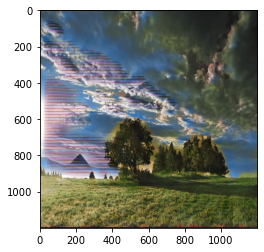

In [7]:
gray = imread('Webp.net-resizeimage (4).jpg')
gray = resize(gray, (1200,1200), mode='constant', preserve_range=True)
if gray.shape[2]>=3:
    gray = gray.mean(axis=-1)
    gray = gray/255
    #with graph.as_default():
    color = final_model.predict(gray.reshape((1,1200,1200,1)))[0]
    plt.imshow(color)

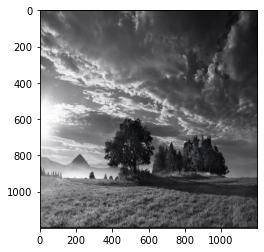

In [6]:
img_input= imread('Webp.net-resizeimage (4).jpg')
plt.imshow(img_input)

In [5]:
from tqdm import tqdm
from skimage.io import imread,imsave
from skimage.transform import resize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


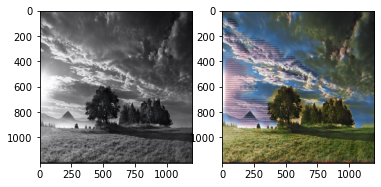

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_input)
ax2.imshow(color)